In [67]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Data set

In [2]:
df = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/Data/seasonal_data.csv', index_col=0)

In [3]:
df.head()

,time,season,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,RegionName
0,2016,autumn,18.094186,13.529070,23.579070,NaN,NaN,112.313953,10.837209,NaN,1014.618605,NaN,Serra Gaúcha
1,2016,summer,13.697143,9.717143,18.541429,NaN,NaN,131.088235,10.426471,NaN,1018.748571,NaN,Serra Gaúcha
2,2016,winter,23.618182,20.281818,28.790909,NaN,NaN,149.818182,9.427273,NaN,1010.763636,NaN,Serra Gaúcha
3,2017,autumn,18.635714,14.408333,23.563095,NaN,NaN,126.912500,10.877500,NaN,1013.252381,NaN,Serra Gaúcha
4,2017,spring,16.202222,12.978889,20.142222,NaN,NaN,112.104651,10.533721,NaN,1017.697778,NaN,Serra Gaúcha


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40601 entries, 0 to 40600
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        40601 non-null  int64  
 1   season      40601 non-null  object 
 2   tavg        39191 non-null  float64
 3   tmin        40149 non-null  float64
 4   tmax        40104 non-null  float64
 5   prcp        30814 non-null  float64
 6   snow        7000 non-null   float64
 7   wdir        36815 non-null  float64
 8   wspd        37017 non-null  float64
 9   wpgt        12379 non-null  float64
 10  pres        35026 non-null  float64
 11  tsun        1634 non-null   float64
 12  RegionName  40601 non-null  object 
dtypes: float64(10), int64(1), object(2)
memory usage: 4.3+ MB


In [5]:
len(df)

40601

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

970

In [8]:
df

,time,season,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,RegionName
1198,2015,autumn,9.055056,6.108989,12.157303,2.339326,0.000000,199.179775,14.973034,39.693103,1018.588764,168.876404,Ribatejo
1199,2015,spring,10.938043,5.652174,16.169565,1.840217,0.000000,243.684783,15.611957,46.417391,1016.418478,394.891304,Ribatejo
1200,2015,summer,17.661702,12.909574,22.672340,3.508511,0.000000,195.829787,13.629787,39.480851,1014.617021,371.297872,Ribatejo
1201,2015,winter,4.515556,1.943333,7.227778,1.964444,0.222222,205.766667,18.117778,45.323333,1016.674444,140.400000,Ribatejo
1202,2016,autumn,7.100000,3.968539,10.231461,1.128090,0.224719,183.550562,12.512360,34.161798,1020.348315,127.213483,Ribatejo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40410,2022,winter,4.252222,1.027778,7.392222,2.311111,0.000000,180.655556,17.485556,41.307778,1022.657778,174.422222,Luxembourg
40411,2023,autumn,8.103371,5.192135,11.230337,3.586517,0.000000,200.629213,15.849438,38.502247,1012.829213,145.471910,Luxembourg
40412,2023,spring,12.519565,7.684783,17.381522,1.508696,0.000000,140.141304,17.364130,39.382609,1016.473913,443.543478,Luxembourg
40414,2023,winter,4.375556,1.835556,6.896667,2.082222,0.333333,188.833333,19.022222,42.222222,1019.288889,134.133333,Luxembourg


In [9]:
df.drop(['wdir', 'wspd', 'wpgt'], axis=1, inplace=True)

In [10]:
df.head(2)

,time,season,tavg,tmin,tmax,prcp,snow,pres,tsun,RegionName
1198,2015,autumn,9.055056,6.108989,12.157303,2.339326,0.0,1018.588764,168.876404,Ribatejo
1199,2015,spring,10.938043,5.652174,16.169565,1.840217,0.0,1016.418478,394.891304,Ribatejo


In [11]:
df = pd.get_dummies(df, columns=['season'], drop_first=True)

In [12]:
df.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'pres', 'tsun',
       'RegionName', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [13]:
coords = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/Data/regions_coords_updated_fv.csv')

In [14]:
coords.columns

Index(['RegionName', 'Location', 'Latitude', 'Longitude'], dtype='object')

In [15]:
region_to_latitude = dict(zip(coords['RegionName'], coords['Latitude']))
region_to_longitude = dict(zip(coords['RegionName'], coords['Longitude']))


In [16]:
def get_latitude(region_name):
    return region_to_latitude.get(region_name, None)

def get_longitude(region_name):
    return region_to_longitude.get(region_name, None)


In [17]:
df['Latitude'] = df['RegionName'].apply(get_latitude)
df['Longitude'] = df['RegionName'].apply(get_longitude)

In [18]:
df

,time,tavg,tmin,tmax,prcp,snow,pres,tsun,RegionName,season_spring,season_summer,season_winter,Latitude,Longitude
1198,2015,9.055056,6.108989,12.157303,2.339326,0.000000,1018.588764,168.876404,Ribatejo,False,False,False,53.549962,9.930416
1199,2015,10.938043,5.652174,16.169565,1.840217,0.000000,1016.418478,394.891304,Ribatejo,True,False,False,53.549962,9.930416
1200,2015,17.661702,12.909574,22.672340,3.508511,0.000000,1014.617021,371.297872,Ribatejo,False,True,False,53.549962,9.930416
1201,2015,4.515556,1.943333,7.227778,1.964444,0.222222,1016.674444,140.400000,Ribatejo,False,False,True,53.549962,9.930416
1202,2016,7.100000,3.968539,10.231461,1.128090,0.224719,1020.348315,127.213483,Ribatejo,False,False,False,53.549962,9.930416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40410,2022,4.252222,1.027778,7.392222,2.311111,0.000000,1022.657778,174.422222,Luxembourg,False,False,True,49.611277,6.129799
40411,2023,8.103371,5.192135,11.230337,3.586517,0.000000,1012.829213,145.471910,Luxembourg,False,False,False,49.611277,6.129799
40412,2023,12.519565,7.684783,17.381522,1.508696,0.000000,1016.473913,443.543478,Luxembourg,True,False,False,49.611277,6.129799
40414,2023,4.375556,1.835556,6.896667,2.082222,0.333333,1019.288889,134.133333,Luxembourg,False,False,True,49.611277,6.129799


### Average temperature

In [19]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres', 'tsun']
target_variable = ['tavg']


In [20]:
X = df[features]
y = df[target_variable]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [24]:
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

In [25]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [26]:
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

Train MSE: 0.10527053789918463
Test MSE: 0.44381236953094805
Train RMSE: 0.3244542154128755
Test RMSE: 0.6661924418146367
Train MAE: 0.20058867056883994
Test MAE: 0.49849141052288476
Train R²: 0.9956137090822683
Test R²: 0.9825682943534162


##### Observar feature importance

In [27]:
numeric_features = ['Latitude', 'Longitude', 'time', 'prcp', 'snow', 'pres', 'tsun']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [29]:
dummy_features = [col for col in df.columns if col.startswith('season_')]

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])

In [31]:
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'time', 'prcp', 'snow',
                                                   'pres', 'tsun']),
                                                 ('dummy', 'passthrough',
                                                  ['season_spring',
                                                   'season_summer',
                                                   'season_winter'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [32]:
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + dummy_features


In [33]:
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_92958/3616348399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


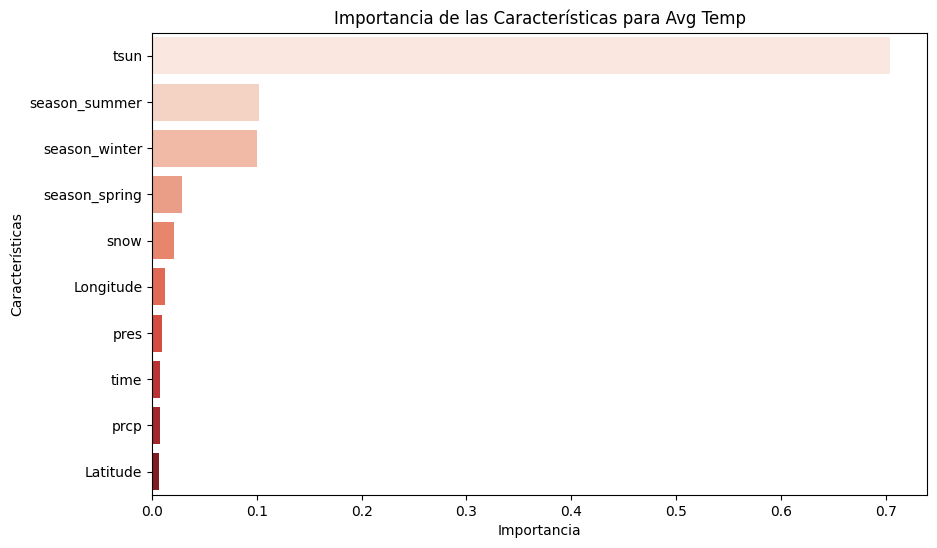

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para Avg Temp')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

##### Vif y correlaciones

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df['season_spring'] = df['season_spring'].astype(int)
df['season_winter'] = df['season_winter'].astype(int)
df['season_summer'] = df['season_summer'].astype(int)


#features_vif = ['Longitude', 'Latitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'time', 'pres', 'tsun']
features_vif = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres', 'tsun']

# Función para calcular el VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calcular VIF
X_vif = df[features_vif]
vif_data = calculate_vif(X_vif)
print(vif_data)

         feature            VIF
0       Latitude    1135.788704
1      Longitude      19.502733
2           time  105648.449011
3  season_spring      11.657481
4  season_summer       6.289423
5  season_winter       2.291604
6           prcp       7.235265
7           snow       1.195751
8           pres  101754.178247
9           tsun      45.383803


In [36]:
# Quitamos la variable time

features_vif = ['Latitude', 'Longitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres', 'tsun']


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calcular VIF
X_vif = df[features_vif]
vif_data = calculate_vif(X_vif)
print(vif_data)

         feature          VIF
0       Latitude  1083.873397
1      Longitude    19.414806
2  season_spring    11.463249
3  season_summer     6.205023
4  season_winter     2.269237
5           prcp     6.190645
6           snow     1.192244
7           pres  1143.576667
8           tsun    44.569613


In [38]:
# Quitamos la variable Latitude

features_vif = ['Longitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres', 'tsun']

# Función para calcular el VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


X_vif = df[features_vif]
vif_data = calculate_vif(X_vif)
print(vif_data)

         feature        VIF
0      Longitude  17.563241
1  season_spring  10.250346
2  season_summer   5.537909
3  season_winter   2.267975
4           prcp   6.072698
5           snow   1.176989
6           pres  42.824930
7           tsun  38.831017


In [39]:
# Quitamos la variable tsun
features_vif = ['Longitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres']
X_vif = df[features_vif]
vif_data = calculate_vif(X_vif)
print(vif_data)

         feature        VIF
0      Longitude  17.563052
1  season_spring   1.988110
2  season_summer   1.410303
3  season_winter   2.245867
4           prcp   5.153027
5           snow   1.165344
6           pres  25.348968


In [40]:
# Quitamos la variable press
features_vif = ['Longitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow']

X_vif = df[features_vif]
vif_data = calculate_vif(X_vif)
print(vif_data)

         feature       VIF
0      Longitude  5.239901
1  season_spring  1.809621
2  season_summer  1.384896
3  season_winter  2.092192
4           prcp  3.987180
5           snow  1.146587


Los valores de VIF indican una multicolinealidad significativa en varias características

          tsun      tavg
tsun  1.000000  0.803637
tavg  0.803637  1.000000


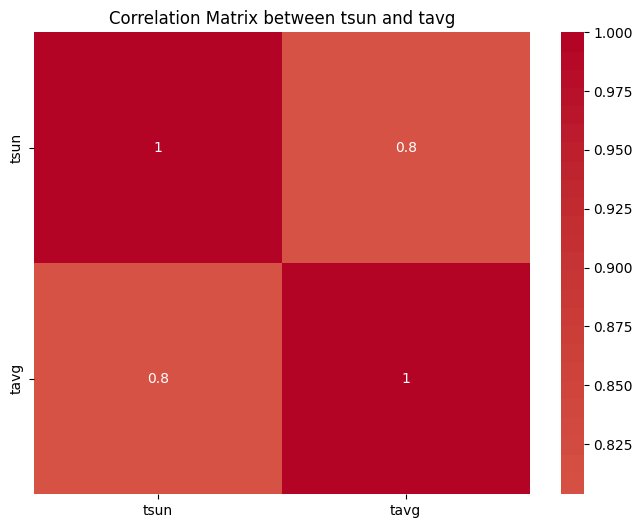

In [82]:
correlation_matrix_tsun_tavg = df[['tsun', 'tavg']].corr()
print(correlation_matrix_tsun_tavg)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_tsun_tavg, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between tsun and tavg')
plt.show()

##### Ajuste modelo tras analisis de correlaciones

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 0.1198542037723402
Test MSE: 0.7509800250604299
Train RMSE: 0.3461996588275907
Test RMSE: 0.866591036799037
Train MAE: 0.24972654957870208
Test MAE: 0.6224297505707352
Train R²: 0.9950060537739244
Test R²: 0.9705036099891652


/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_96122/3727679379.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


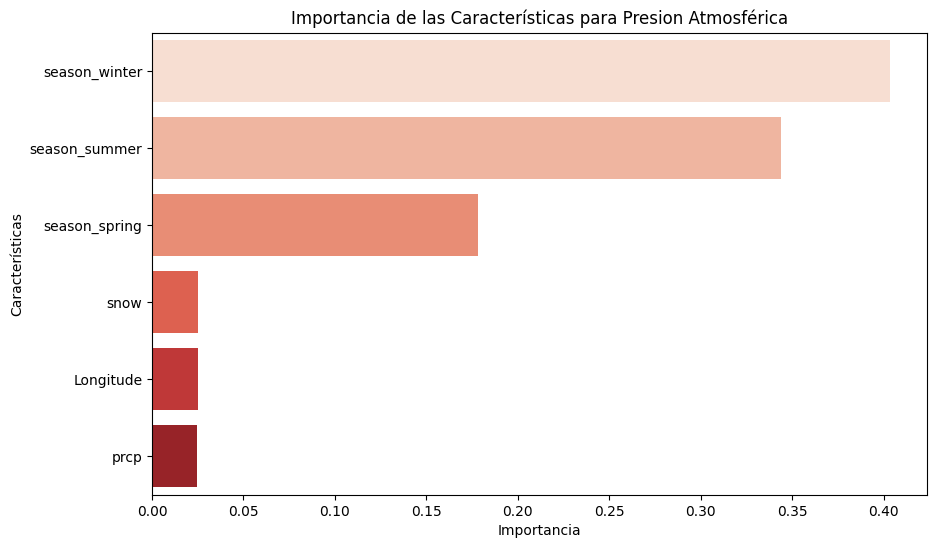

In [41]:
features = ['Longitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow']
target_variable = ['tavg']

X = df[features]
y = df[target_variable]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


numeric_features = ['Longitude', 'prcp', 'snow']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + dummy_features

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para Presion Atmosférica')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [46]:
# Colores para las gráficas
granate_palette = sns.color_palette("Reds", 10)

# Crear una función para graficar resultados
def plot_model_performance(results):
    variables = list(results.keys())
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 8))  # Tamaño ajustado
    
    # Convertir axes en lista si solo hay un subplot
    if len(variables) == 1:
        axes = [axes]
    
    for ax, var in zip(axes, variables):
        result = results[var]
        y_test = result['y_test']
        y_pred = result['y_pred']
        
        sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='maroon', alpha=0.6)
        sns.lineplot(x=y_test, y=y_test, ax=ax, color='black', linestyle='--')
        
        ax.set_title(f'Resultados para {var}')
        ax.set_xlabel('Valores Reales')
        ax.set_ylabel('Valores Predichos')
        
        mse = result['MSE']
        mae = result['MAE']
        rmse = result['RMSE']
        r2 = result['R²']
        
        ax.text(0.1, 0.9, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}',
                transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

In [74]:
features = ['Longitude', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow']
target_variable = 'tavg'

X = df[features]
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['Longitude', 'prcp', 'snow']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])


rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)

model_filename = f'model_{target_variable}.joblib'
joblib.dump(pipeline, model_filename)
print(f'Model for {target_variable} saved as {model_filename}')

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


results_tavg = {
    'tavg': {
        'y_test': y_test,
        'y_pred': y_test_pred,
        'MSE': test_mse,
        'MAE': test_mae,
        'RMSE': test_rmse,
        'R²': test_r2
    }
}

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

Model for tavg saved as model_tavg.joblib
Train MSE: 0.11951078538904217
Test MSE: 0.7517514671951406
Train RMSE: 0.3457033198987857
Test RMSE: 0.867036024162284
Train MAE: 0.24930324698714623
Test MAE: 0.6236402823114932
Train R²: 0.9950203629335972
Test R²: 0.9704733099048529


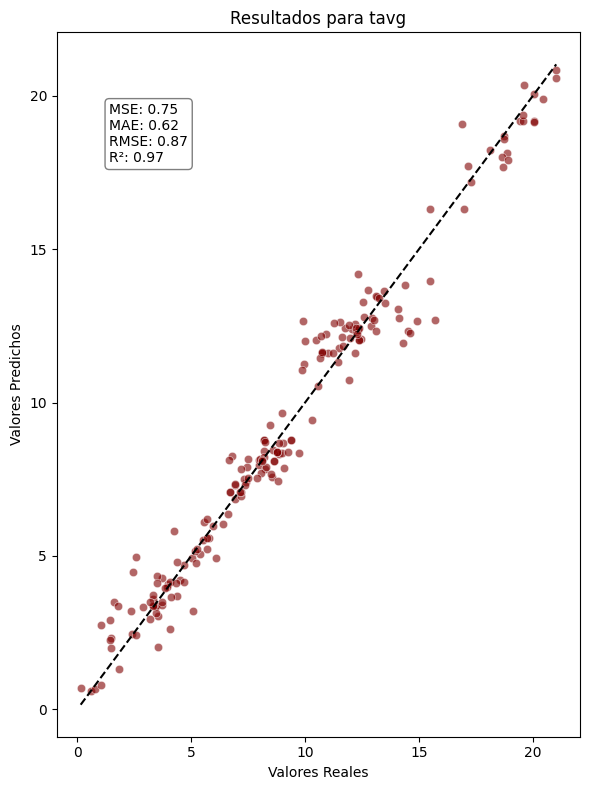

In [48]:
plot_model_performance(results_tavg)

La línea recta representa una línea de referencia que se usa para comparar las predicciones del modelo con los valores reales. Esta línea es una línea de identidad (Y = X), lo que significa que si todas las predicciones fueran perfectas, todos los puntos estarían sobre esta línea. Cuanto más cerca estén los puntos de esta línea, mejor será el rendimiento del modelo.


##### Visualizar evolución de tavg

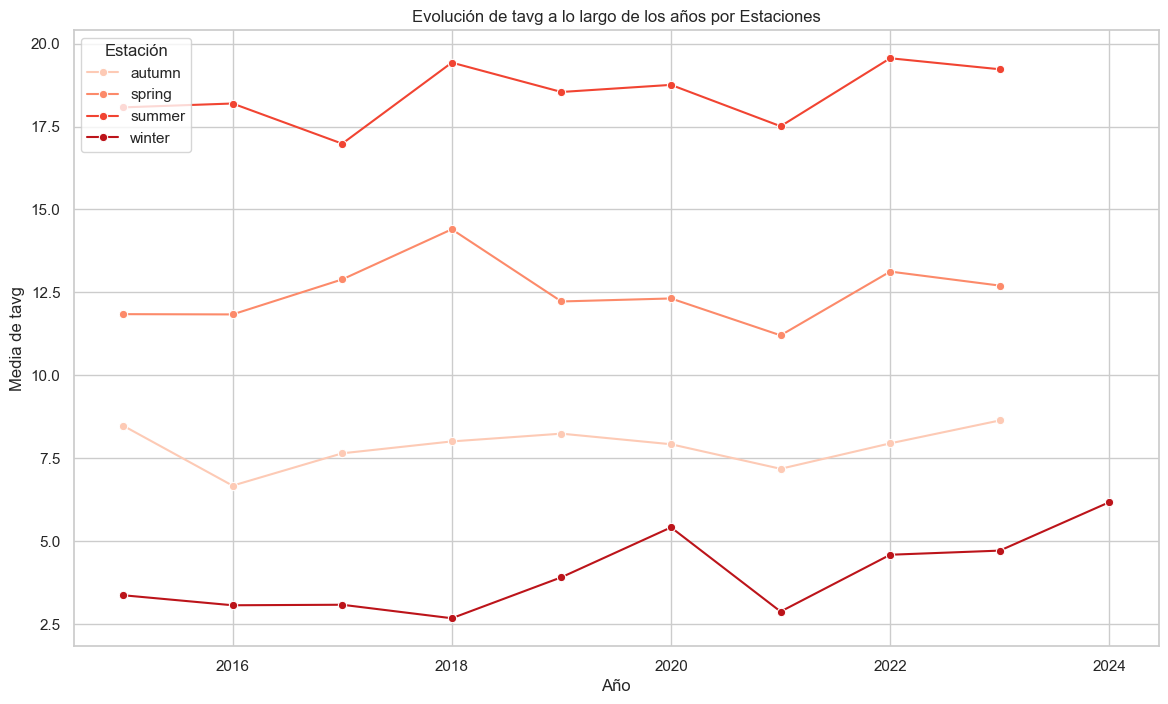

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

df['season_label'] = df.apply(lambda row: 'spring' if row['season_spring'] else 'summer' if row['season_summer'] else 'winter' if row['season_winter'] else 'autumn', axis=1)

df_grouped = df.groupby(['time', 'season_label'])['tavg'].mean().reset_index()
sns.set(style='whitegrid')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_grouped, x='time', y='tavg', hue='season_label', palette='Reds', marker='o')


plt.title('Evolución de tavg a lo largo de los años por Estaciones')
plt.xlabel('Año')
plt.ylabel('Media de tavg')
plt.legend(title='Estación', loc='upper left')

plt.show()

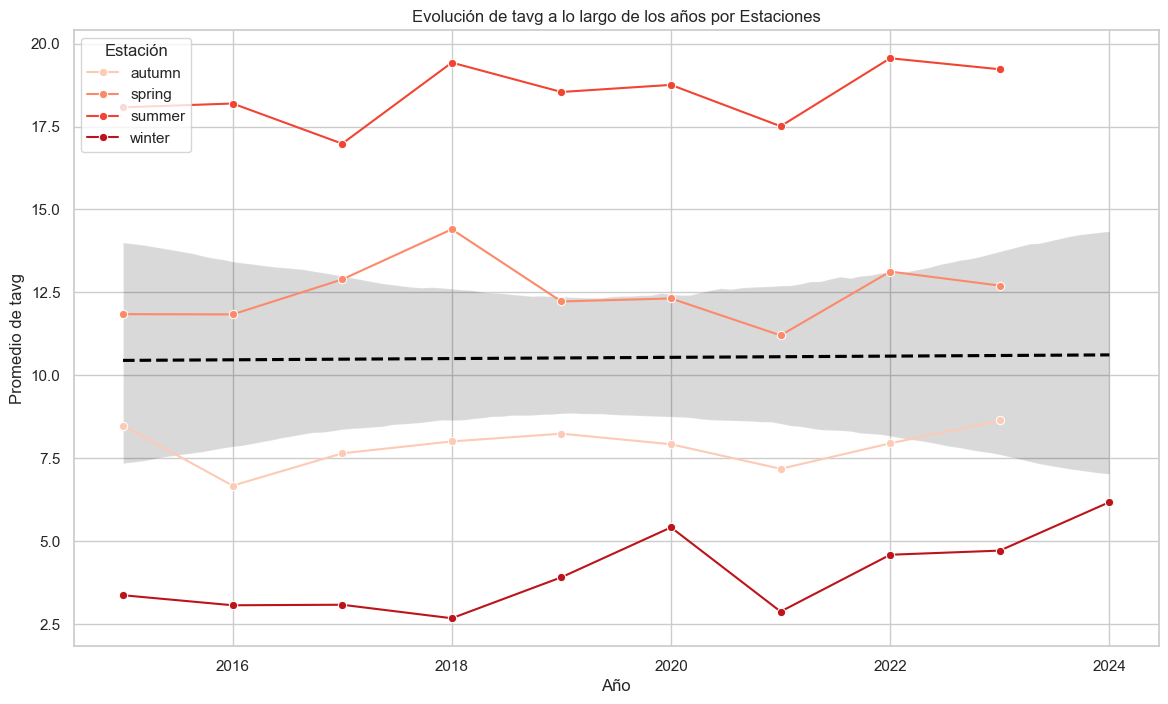

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarte de que 'time' sea de tipo datetime
df['time'] = pd.to_datetime(df['time'], format='%Y')

# Crear una columna de año
df['year'] = df['time'].dt.year

# Agrupar por año y estación, calculando el promedio de tavg
df_grouped = df.groupby(['year', 'season_label'])['tavg'].mean().reset_index()

# Configurar el estilo de los gráficos
sns.set(style='whitegrid')

# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

# Graficar la evolución de tavg a lo largo de los años, separado por estaciones dentro de cada año
sns.lineplot(data=df_grouped, x='year', y='tavg', hue='season_label', marker='o', palette='Reds')

# Añadir una línea de tendencia general
sns.regplot(data=df_grouped, x='year', y='tavg', scatter=False, color='black', line_kws={"linestyle":"--"})

# Títulos y etiquetas
plt.title('Evolución de tavg a lo largo de los años por Estaciones')
plt.xlabel('Año')
plt.ylabel('Promedio de tavg')
plt.legend(title='Estación', loc='upper left')

# Mostrar el gráfico
plt.show()

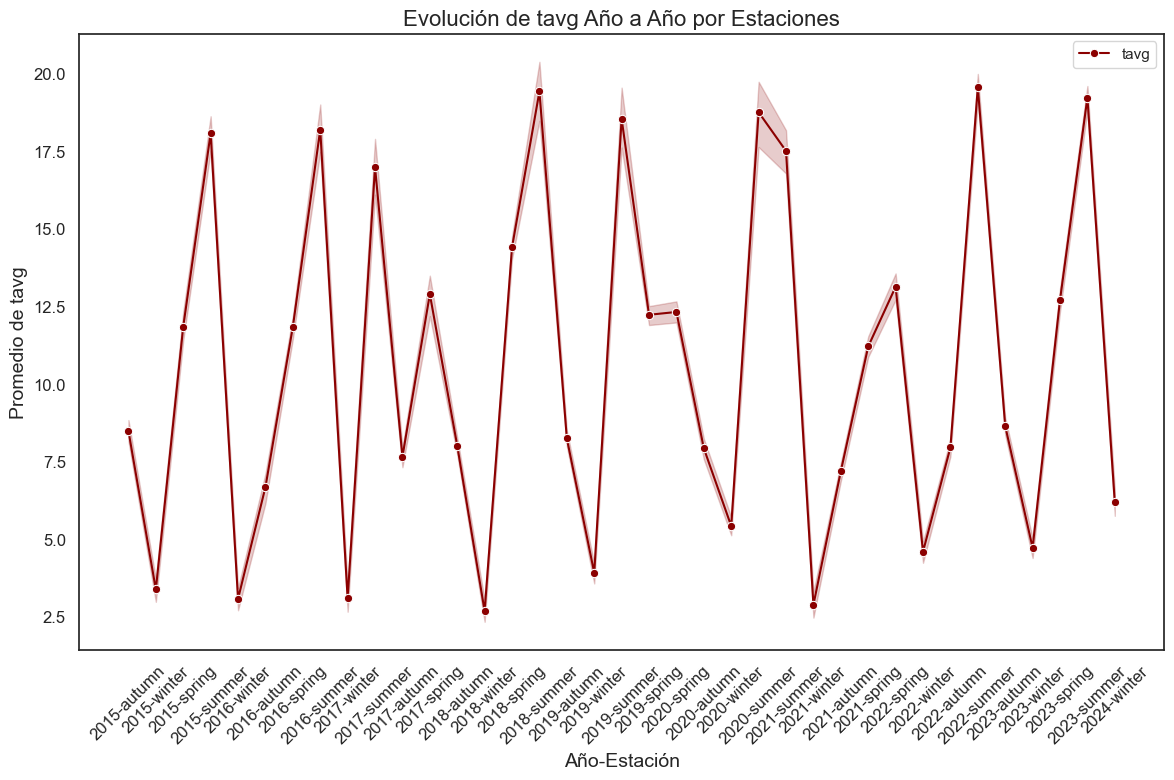

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear la columna combinada 'year_season'
df['year_season'] = df['year'].astype(str) + '-' + df['season_label'].astype(str)

# Ordenar los datos por 'time' para asegurar la continuidad en la gráfica
df = df.sort_values(by='time')

# Configurar el estilo de los gráficos
sns.set(style='white')

# Crear la figura y los ejes
plt.figure(figsize=(14, 8))

# Graficar la evolución de tavg año a año a lo largo de las estaciones
sns.lineplot(data=df, x='year_season', y='tavg', marker='o', color='darkred', label='tavg')

# Añadir la línea de tendencia


# Títulos y etiquetas
plt.title('Evolución de tavg Año a Año por Estaciones', fontsize=16)
plt.xlabel('Año-Estación', fontsize=14)
plt.ylabel('Promedio de tavg', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()

### Horas de luz

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for ['tsun'] saved as model_['tsun'].joblib
Train MSE: 116.08199417440493
Test MSE: 818.656775542705
Train RMSE: 10.77413542584299
Test RMSE: 28.612178797545372
Train MAE: 6.171925908248062
Test MAE: 18.22543796278128
Train R²: 0.9946935249583242
Test R²: 0.9609959618511885


/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_96122/3521275079.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


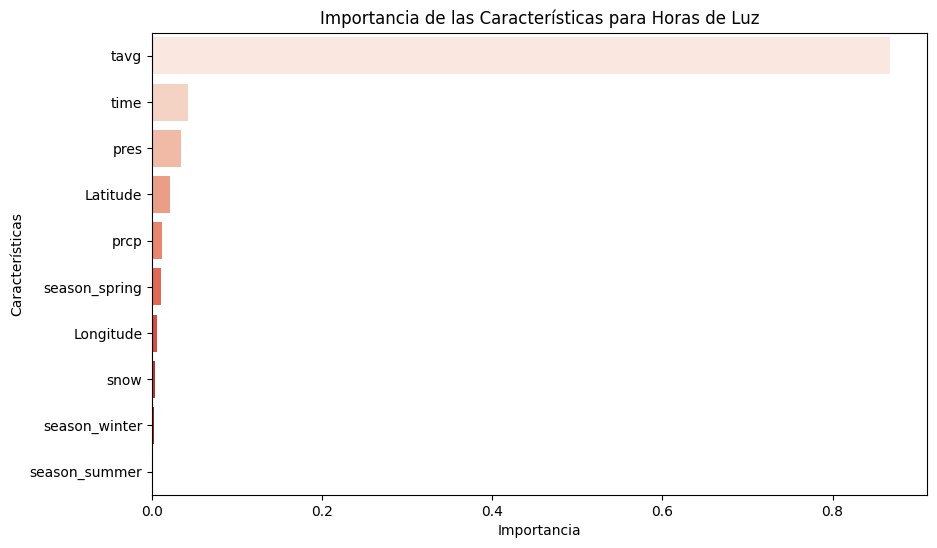

In [69]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres', 'tavg']
target_variable = ['tsun']

X = df[features]
y = df[target_variable]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

model_filename = f'model_{target_variable}.joblib'
joblib.dump(pipeline, model_filename)
print(f'Model for {target_variable} saved as {model_filename}')

y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


numeric_features = ['Latitude', 'Longitude', 'time', 'prcp', 'snow', 'pres', 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + dummy_features

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para Horas de Luz')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [75]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'pres']
target_variable = ['tsun']

X = df[features]
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['Latitude', 'Longitude', 'time', 'prcp', 'snow', 'pres']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])


rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)

model_filename = f'model_{target_variable}.joblib'
joblib.dump(pipeline, model_filename)
print(f'Model for {target_variable} saved as {model_filename}')

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


results_tsun = {
    'tsun': {
        'y_test': y_test,
        'y_pred': y_test_pred,
        'MSE': test_mse,
        'MAE': test_mae,
        'RMSE': test_rmse,
        'R²': test_r2
    }
}

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for ['tsun'] saved as model_['tsun'].joblib
Train MSE: 94.23040784165346
Test MSE: 543.6231481611029
Train RMSE: 9.70723481953813
Test RMSE: 23.315727485135497
Train MAE: 5.7303927181191545
Test MAE: 15.982402405186987
Train R²: 0.9956924300712184
Test R²: 0.9740996487870067


In [56]:
granate_palette = sns.color_palette("Reds", 10)

# Crear una función para graficar resultados
def plot_model_performance(results):
    variables = list(results.keys())
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 8))  # Tamaño ajustado
    
    # Convertir axes en lista si solo hay un subplot
    if len(variables) == 1:
        axes = [axes]
    
    for ax, var in zip(axes, variables):
        result = results[var]
        y_test = result['y_test'].values.ravel()  # Aplanar el array
        y_pred = result['y_pred'].ravel()  # Aplanar el array
        
        sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='maroon', alpha=0.6)
        sns.lineplot(x=y_test, y=y_test, ax=ax, color='black', linestyle='--')
        
        ax.set_title(f'Resultados para {var}')
        ax.set_xlabel('Valores Reales')
        ax.set_ylabel('Valores Predichos')
        
        mse = result['MSE']
        mae = result['MAE']
        rmse = result['RMSE']
        r2 = result['R²']
        
        ax.text(0.1, 0.9, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}',
                transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

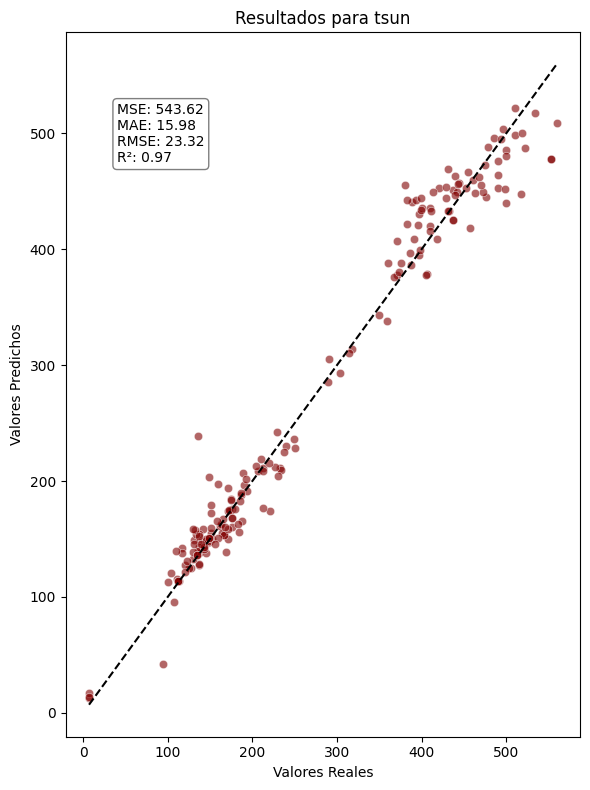

In [57]:
plot_model_performance(results_tsun)

### Presion Atmosférica

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 0.29592936559119226
Test MSE: 3.346018176149312
Train RMSE: 0.5439939021636109
Test RMSE: 1.8292124469698188
Train MAE: 0.3593597427755929
Test MAE: 0.9946525247845047
Train R²: 0.970569649591112
Test R²: 0.6804193786248884


/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_92958/346704122.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


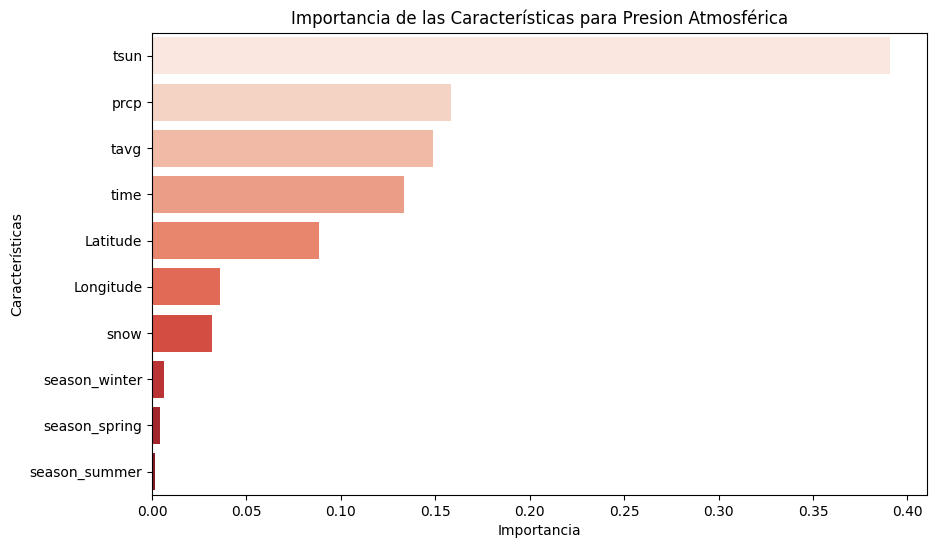

In [72]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'tsun' , 'tavg']
target_variable = ['pres']

X = df[features]
y = df[target_variable]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


numeric_features = ['Latitude', 'Longitude', 'time', 'prcp', 'snow', 'tsun', 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + dummy_features

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para Presion Atmosférica')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [76]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'prcp', 'snow', 'tsun' , 'tavg']
target_variable = ['pres']

X = df[features]
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['Latitude', 'Longitude', 'time', 'prcp', 'snow', 'tsun', 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])


rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)

model_filename = f'model_{target_variable}.joblib'
joblib.dump(pipeline, model_filename)
print(f'Model for {target_variable} saved as {model_filename}')

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


results_pres = {
    'pres': {
        'y_test': y_test,
        'y_pred': y_test_pred,
        'MSE': test_mse,
        'MAE': test_mae,
        'RMSE': test_rmse,
        'R²': test_r2
    }
}

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for ['pres'] saved as model_['pres'].joblib
Train MSE: 0.29752647872454363
Test MSE: 3.3340128232384276
Train RMSE: 0.5454598781987028
Test RMSE: 1.8259279348425632
Train MAE: 0.3627313931264877
Test MAE: 0.9935796641723974
Train R²: 0.9704108157455311
Test R²: 0.6815660185835224


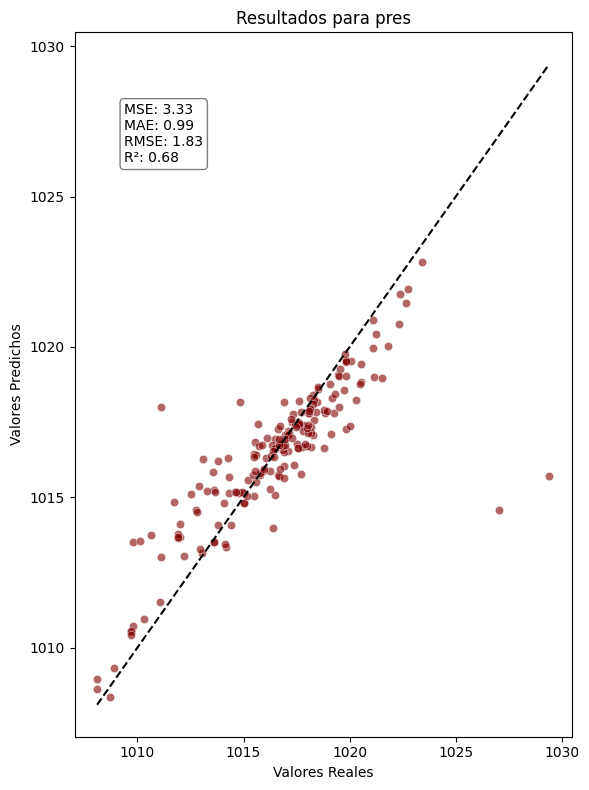

In [60]:
plot_model_performance(results_pres)

### Precipitaciones

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 0.0664045046189245
Test MSE: 0.3416169659590969
Train RMSE: 0.2576907150421305
Test RMSE: 0.5844800817471002
Train MAE: 0.1438145447155328
Test MAE: 0.37799325425193675
Train R²: 0.9371882630816748
Test R²: 0.6680917285471657


/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_96122/2110723888.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


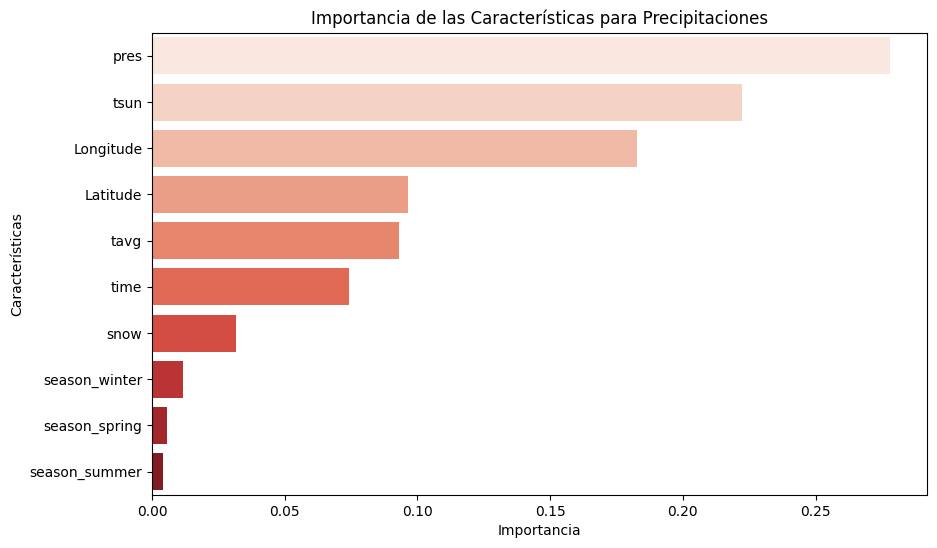

In [42]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'pres', 'snow', 'tsun' , 'tavg']
target_variable = ['prcp']

X = df[features]
y = df[target_variable]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


numeric_features = ['Latitude', 'Longitude', 'time', 'pres', 'snow', 'tsun', 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + dummy_features

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para Precipitaciones')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [77]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'pres', 'snow', 'tsun' , 'tavg']
target_variable = ['prcp']

X = df[features]
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['Latitude', 'Longitude', 'time', 'pres', 'snow', 'tsun', 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])


rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)

model_filename = f'model_{target_variable}.joblib'
joblib.dump(pipeline, model_filename)
print(f'Model for {target_variable} saved as {model_filename}')

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


results_prcp = {
    'prcp': {
        'y_test': y_test,
        'y_pred': y_test_pred,
        'MSE': test_mse,
        'MAE': test_mae,
        'RMSE': test_rmse,
        'R²': test_r2
    }
}

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for ['prcp'] saved as model_['prcp'].joblib
Train MSE: 0.06660543602570075
Test MSE: 0.34250210830449007
Train RMSE: 0.25808028988223947
Test RMSE: 0.5852367967792952
Train MAE: 0.14427352174249647
Test MAE: 0.37809690274062335
Train R²: 0.9369982029233545
Test R²: 0.667231741792631


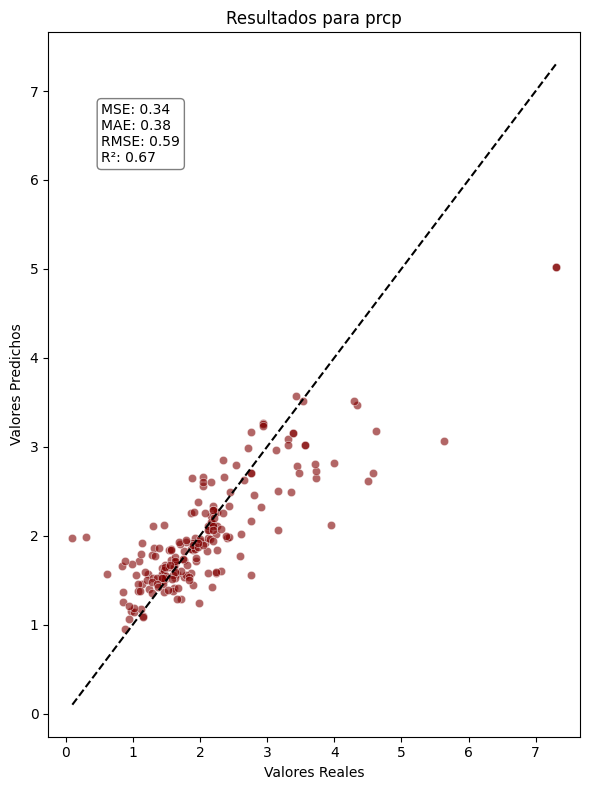

In [63]:
plot_model_performance(results_prcp)

### Nieve

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train MSE: 5.380995780578872
Test MSE: 212.30377095149603
Train RMSE: 2.3196973467629074
Test RMSE: 14.570647581747904
Train MAE: 0.7144658024852146
Test MAE: 3.028910583961463
Train R²: 0.9247269361398619
Test R²: 0.470035179899435


/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_96122/3362653255.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


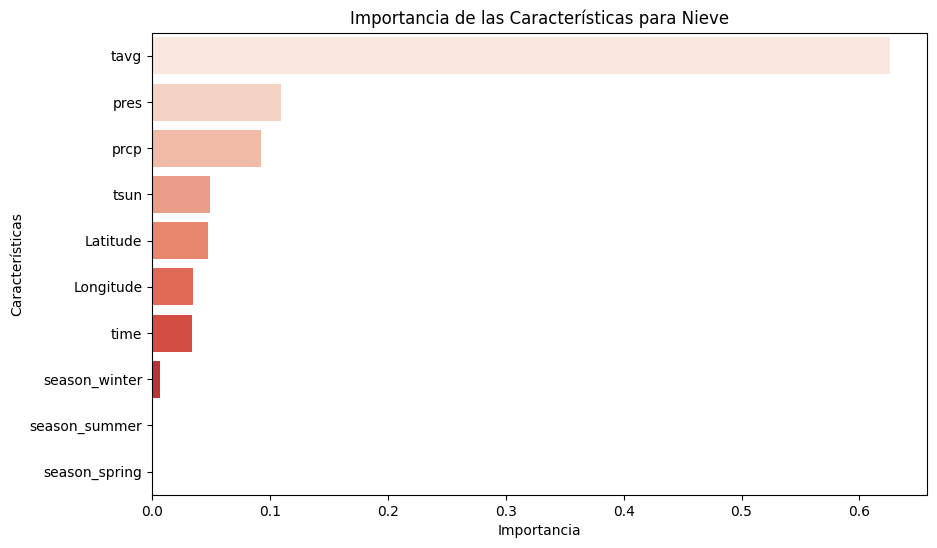

In [43]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'pres', 'prcp', 'tsun' , 'tavg']
target_variable = ['snow']

X = df[features]
y = df[target_variable]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


numeric_features = ['Latitude', 'Longitude', 'time', 'pres', 'prcp', 'tsun' , 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + dummy_features

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para Nieve')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [78]:
features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'pres', 'prcp', 'tsun' , 'tavg']
target_variable = ['snow']

X = df[features]
y = df[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



numeric_features = ['Latitude', 'Longitude', 'time', 'pres', 'prcp', 'tsun' , 'tavg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
dummy_features = [col for col in df.columns if col.startswith('season_')]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('dummy', 'passthrough', dummy_features)
    ])


rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf)])
pipeline.fit(X_train, y_train)

model_filename = f'model_{target_variable}.joblib'
joblib.dump(pipeline, model_filename)
print(f'Model for {target_variable} saved as {model_filename}')

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


results_snow = {
    'snow': {
        'y_test': y_test,
        'y_pred': y_test_pred,
        'MSE': test_mse,
        'MAE': test_mae,
        'RMSE': test_rmse,
        'R²': test_r2
    }
}

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model for ['snow'] saved as model_['snow'].joblib
Train MSE: 5.331134462004004
Test MSE: 214.66630605978708
Train RMSE: 2.308924958071181
Test RMSE: 14.651495011082899
Train MAE: 0.7163084526749495
Test MAE: 3.060262235457561
Train R²: 0.9254244305015529
Test R²: 0.464137684588658


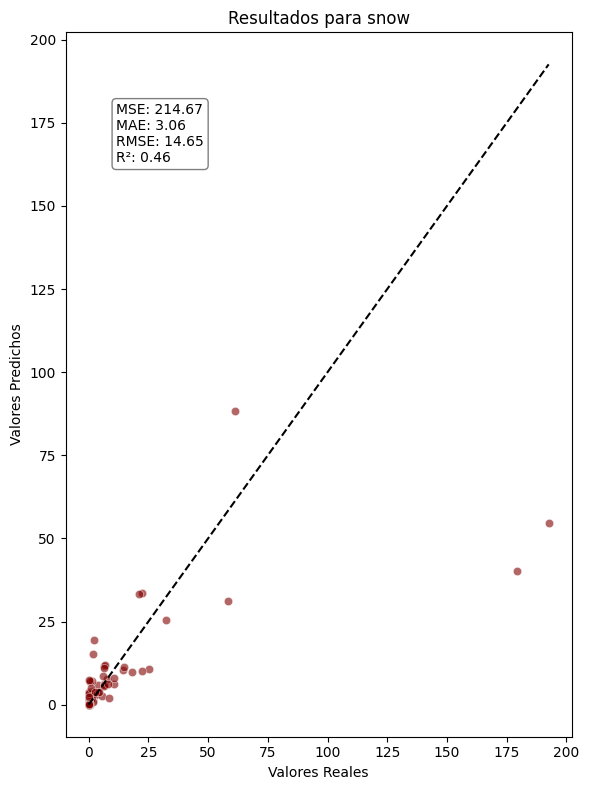

In [66]:
plot_model_performance(results_snow)

### Future predictions

In [80]:
import joblib
import pandas as pd
import numpy as np


models = {
    'prcp': joblib.load("model_['prcp'].joblib"),
    'snow': joblib.load("model_['snow'].joblib"),
    'pres': joblib.load("model_['pres'].joblib"),
    'tsun': joblib.load("model_['tsun'].joblib"),
    'tavg': joblib.load('model_tavg.joblib')
}

In [85]:
future_years = range(2024, 2034)
future_seasons = ['spring', 'summer', 'autumn', 'winter'] 

In [86]:
predictions = []


for region in df['RegionName'].unique():

    region_data = df[df['RegionName'] == region].iloc[0]
    latitude = region_data['Latitude']
    longitude = region_data['Longitude']
    future_data = pd.DataFrame([
        {'time': year, 'season': season, 'Latitude': latitude, 'Longitude': longitude}
        for year in future_years for season in future_seasons
    ])


    future_data = pd.get_dummies(future_data, columns=['season'], drop_first=False)
    future_data.rename(columns={'season_winter': 'season_winter', 'season_spring': 'season_spring', 'season_summer': 'season_summer', 'season_autumn': 'season_autumn'}, inplace=True)


    features = ['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer', 'season_winter', 'pres', 'prcp', 'tsun', 'tavg', 'snow']
    for feature in features:
        if feature not in future_data.columns:
            future_data[feature] = 0  


    future_data = future_data.reindex(columns=features, fill_value=0)


    for target, model in models.items():
        future_data[target] = model.predict(future_data)
    

    future_data['RegionName'] = region

    predictions.append(future_data)


predictions_df = pd.concat(predictions, ignore_index=True)

In [90]:
predictions_df.head()

,Latitude,Longitude,time,season_spring,season_summer,season_winter,pres,prcp,tsun,tavg,snow,RegionName
0,53.549962,9.930416,2024,True,False,False,1005.123614,4.013258,419.190417,11.929891,67.871925,Ribatejo
1,53.549962,9.930416,2024,False,True,False,1005.123614,4.013258,408.996105,17.165915,67.871925,Ribatejo
2,53.549962,9.930416,2024,False,False,False,1005.123614,4.013258,37.126404,7.953666,67.871925,Ribatejo
3,53.549962,9.930416,2024,False,False,True,1005.042591,4.009067,7.460000,1.024612,67.871925,Ribatejo
4,53.549962,9.930416,2025,True,False,False,1005.123614,4.013258,419.190417,11.929891,67.871925,Ribatejo


In [92]:
predictions_df.columns

Index(['Latitude', 'Longitude', 'time', 'season_spring', 'season_summer',
       'season_winter', 'pres', 'prcp', 'tsun', 'tavg', 'snow', 'RegionName'],
      dtype='object')

In [ ]:
# Agregar una columna de estación 'season' basada en las columnas dummy
def determine_season(row):
    if row['season_spring']:
        return 'spring'
    elif row['season_summer']:
        return 'summer'
    elif row['season_winter']:
        return 'winter'
    else:
        return 'autumn'

predictions_df['season'] = predictions_df.apply(determine_season, axis=1)

# Eliminar las columnas dummy de las estaciones
predictions_df.drop(columns=['season_spring', 'season_summer', 'season_winter'], inplace=True)

In [104]:
predictions_df.columns

Index(['Latitude', 'Longitude', 'time', 'pres', 'prcp', 'tsun', 'tavg', 'snow',
       'RegionName', 'season'],
      dtype='object')

In [99]:
df['season'] = df.apply(determine_season, axis=1)

In [101]:
df.drop(columns=['season_spring', 'season_summer', 'season_winter'], inplace=True)

In [102]:
df.head()

,time,tavg,tmin,tmax,prcp,snow,pres,tsun,RegionName,Latitude,Longitude,season
1198,2015,9.055056,6.108989,12.157303,2.339326,0.000000,1018.588764,168.876404,Ribatejo,53.549962,9.930416,autumn
1199,2015,10.938043,5.652174,16.169565,1.840217,0.000000,1016.418478,394.891304,Ribatejo,53.549962,9.930416,spring
1200,2015,17.661702,12.909574,22.672340,3.508511,0.000000,1014.617021,371.297872,Ribatejo,53.549962,9.930416,summer
1201,2015,4.515556,1.943333,7.227778,1.964444,0.222222,1016.674444,140.400000,Ribatejo,53.549962,9.930416,winter
1202,2016,7.100000,3.968539,10.231461,1.128090,0.224719,1020.348315,127.213483,Ribatejo,53.549962,9.930416,autumn


In [103]:
df.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'pres', 'tsun',
       'RegionName', 'Latitude', 'Longitude', 'season'],
      dtype='object')

In [106]:
columns_order = ['time', 'season', 'tavg', 'prcp', 'snow', 'pres', 'tsun',
                 'RegionName', 'Latitude', 'Longitude']

# Reordenar las columnas en ambos DataFrames
df = df[columns_order]
predictions_df = predictions_df[columns_order]

# Concatenar los DataFrames
combined_climate_df = pd.concat([df, predictions_df], ignore_index=True)


In [109]:
combined_climate_df.head()

,time,season,tavg,prcp,snow,pres,tsun,RegionName,Latitude,Longitude
0,2015,autumn,9.055056,2.339326,0.000000,1018.588764,168.876404,Ribatejo,53.549962,9.930416
1,2015,spring,10.938043,1.840217,0.000000,1016.418478,394.891304,Ribatejo,53.549962,9.930416
2,2015,summer,17.661702,3.508511,0.000000,1014.617021,371.297872,Ribatejo,53.549962,9.930416
3,2015,winter,4.515556,1.964444,0.222222,1016.674444,140.400000,Ribatejo,53.549962,9.930416
4,2016,autumn,7.100000,1.128090,0.224719,1020.348315,127.213483,Ribatejo,53.549962,9.930416


#### Añadir country

In [126]:
coords = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/Data/wines_final_data.csv', index_col=0)

In [128]:
region_to_country = coords.set_index('RegionName')['Country'].to_dict()

In [129]:
combined_climate_df['country'] = combined_climate_df['RegionName'].map(region_to_country)

In [132]:
combined_climate_df

,time,season,tavg,prcp,snow,pres,tsun,RegionName,Latitude,Longitude,country
0,2015,autumn,9.055056,2.339326,0.000000,1018.588764,168.876404,Ribatejo,53.549962,9.930416,Portugal
1,2015,spring,10.938043,1.840217,0.000000,1016.418478,394.891304,Ribatejo,53.549962,9.930416,Portugal
2,2015,summer,17.661702,3.508511,0.000000,1014.617021,371.297872,Ribatejo,53.549962,9.930416,Portugal
3,2015,winter,4.515556,1.964444,0.222222,1016.674444,140.400000,Ribatejo,53.549962,9.930416,Portugal
4,2016,autumn,7.100000,1.128090,0.224719,1020.348315,127.213483,Ribatejo,53.549962,9.930416,Portugal
...,...,...,...,...,...,...,...,...,...,...,...
2405,2032,winter,1.859081,9.378132,68.412124,1009.946891,29.480000,Luxembourg,49.611277,6.129799,Luxembourg
2406,2033,spring,12.337120,9.004413,68.412124,1009.946891,419.529565,Luxembourg,49.611277,6.129799,Luxembourg
2407,2033,summer,19.023734,9.004413,68.412124,1009.946891,428.408003,Luxembourg,49.611277,6.129799,Luxembourg
2408,2033,autumn,7.979524,9.004413,68.412124,1009.946891,51.323371,Luxembourg,49.611277,6.129799,Luxembourg


In [133]:
combined_climate_df.to_csv('data_climate_pred_fv.csv')

In [134]:
combined_climate_df.columns

Index(['time', 'season', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'RegionName',
       'Latitude', 'Longitude', 'country'],
      dtype='object')

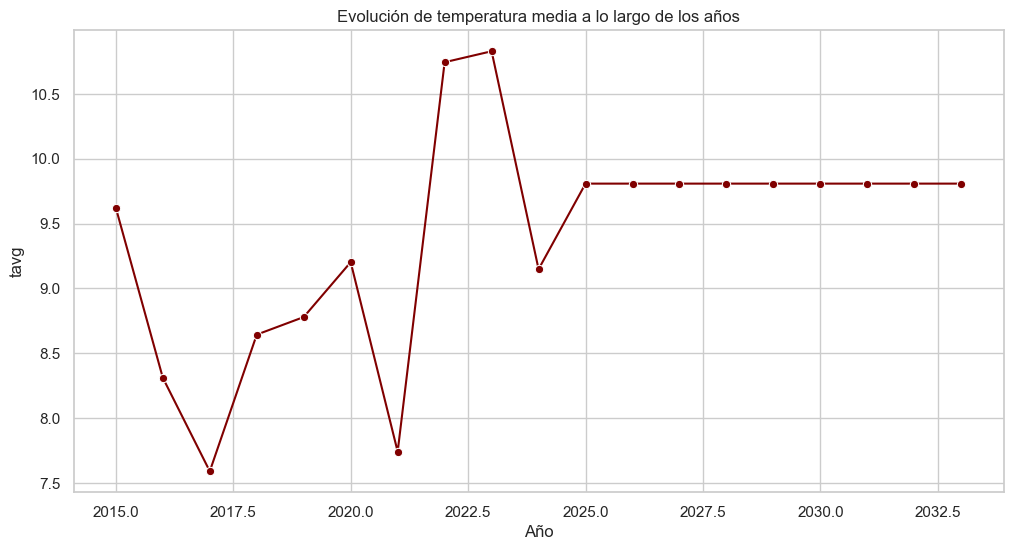

In [145]:
average_tavg_per_year = combined_climate_df.groupby('time')['tavg'].mean().reset_index()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='tavg', data=average_tavg_per_year, marker='o', color='maroon')

plt.title('Evolución de temperatura media a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('tavg')

plt.show()

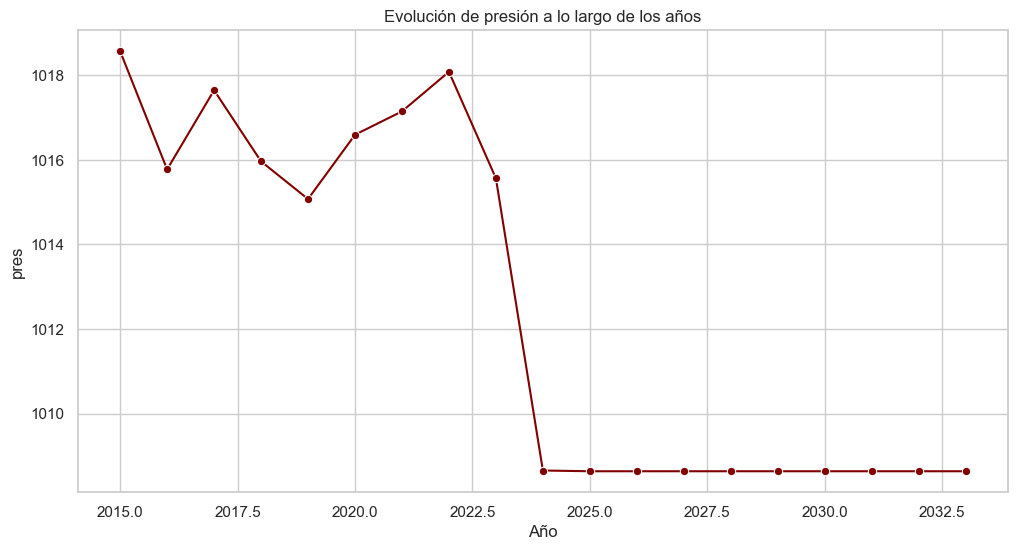

In [143]:
average_tavg_per_year = combined_climate_df.groupby('time')['pres'].mean().reset_index()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='pres', data=average_tavg_per_year, marker='o', color='maroon')

plt.title('Evolución de presión a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('pres')

plt.show()

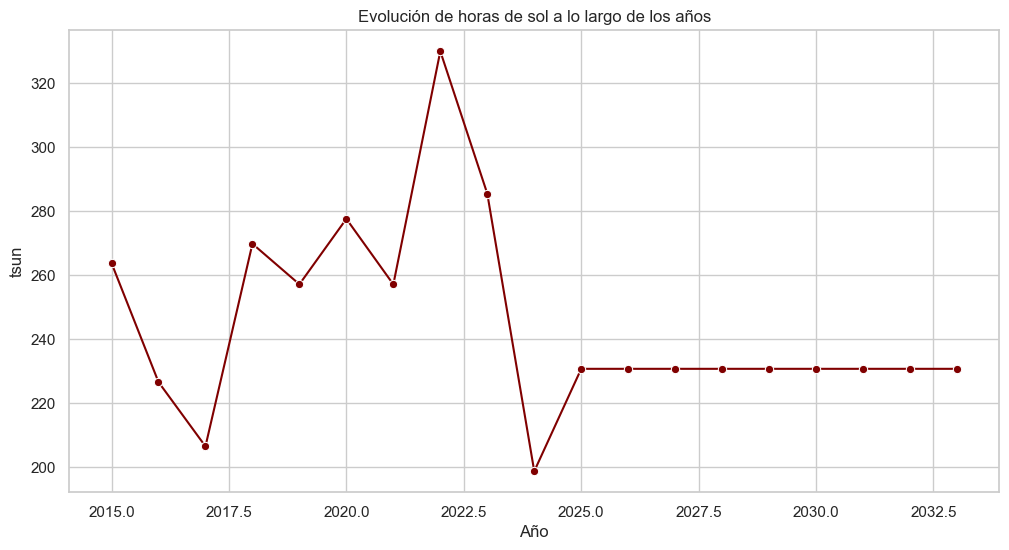

In [144]:
average_tavg_per_year = combined_climate_df.groupby('time')['tsun'].mean().reset_index()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='tsun', data=average_tavg_per_year, marker='o', color='maroon')

plt.title('Evolución de horas de sol a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('tsun')

plt.show()